In [101]:
"""
Title: "Emotion Detection in Text Using Natural Language Processing and Machine Learning"

>Text classification
>Sentiment Analysis


Aim:
The goal of the Emotion Analysis from Text project is to teach the computer to understand and recognize emotions in written text. We want the computer to read sentences and figure out if the writer is happy, sad, angry, or feeling other emotions. This can be useful for things like understanding customer reviews or analyzing social media posts.

Author: Dharmagna Vyas
"""

'\nEmotion Detection Of Text (Emotionn Classification of Text)\n>Text classification\n>Sentiment Analysis\n\n\nAim:\nThe goal of the Emotion Analysis from Text project is to teach the computer to understand and recognize emotions in written text. We want the computer to read sentences and figure out if the writer is happy, sad, angry, or feeling other emotions. This can be useful for things like understanding customer reviews or analyzing social media posts.\n\nAuthor: Dharmagna Vyas\n'

In [ ]:
### Step 1: Import necessary libraries

In [14]:
import pandas as pd
import numpy as np

In [15]:
#Load Data Viz Pkgs
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
!pip install neattext


In [17]:
### Step 2: Load Text Cleaning Library
import neattext.functions as nfx

In [18]:
# Step 3: Load the dataset
df = pd.read_csv("C:\\Users\\Dharmagna Vyas\\Downloads\\emotion_dataset.csv\\emotion_dataset.csv")

In [19]:
# Step 4: Display the first few rows of the dataset
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [20]:
# Step 5: Display dataset shape and data types
df.shape

(34792, 4)

In [21]:

df.dtypes

Unnamed: 0     int64
Emotion       object
Text          object
Clean_Text    object
dtype: object

In [22]:
# Step 6: Check for missing values
df.isnull().sum()

Unnamed: 0      0
Emotion         0
Text            0
Clean_Text    466
dtype: int64

In [23]:
 #Value Counts of Emotions
df['Emotion'].value_counts()  

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<Axes: >

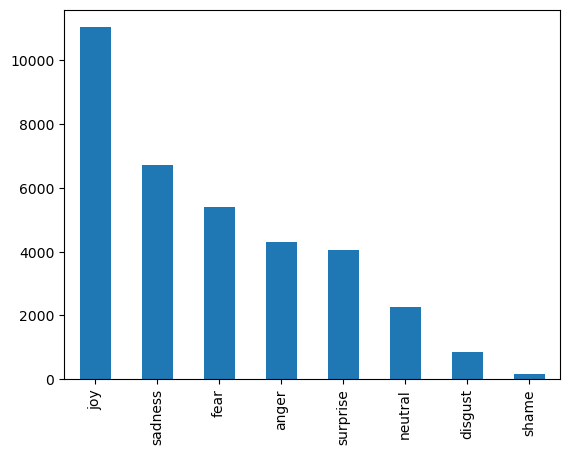

In [24]:
df['Emotion'].value_counts().plot(kind='bar') 

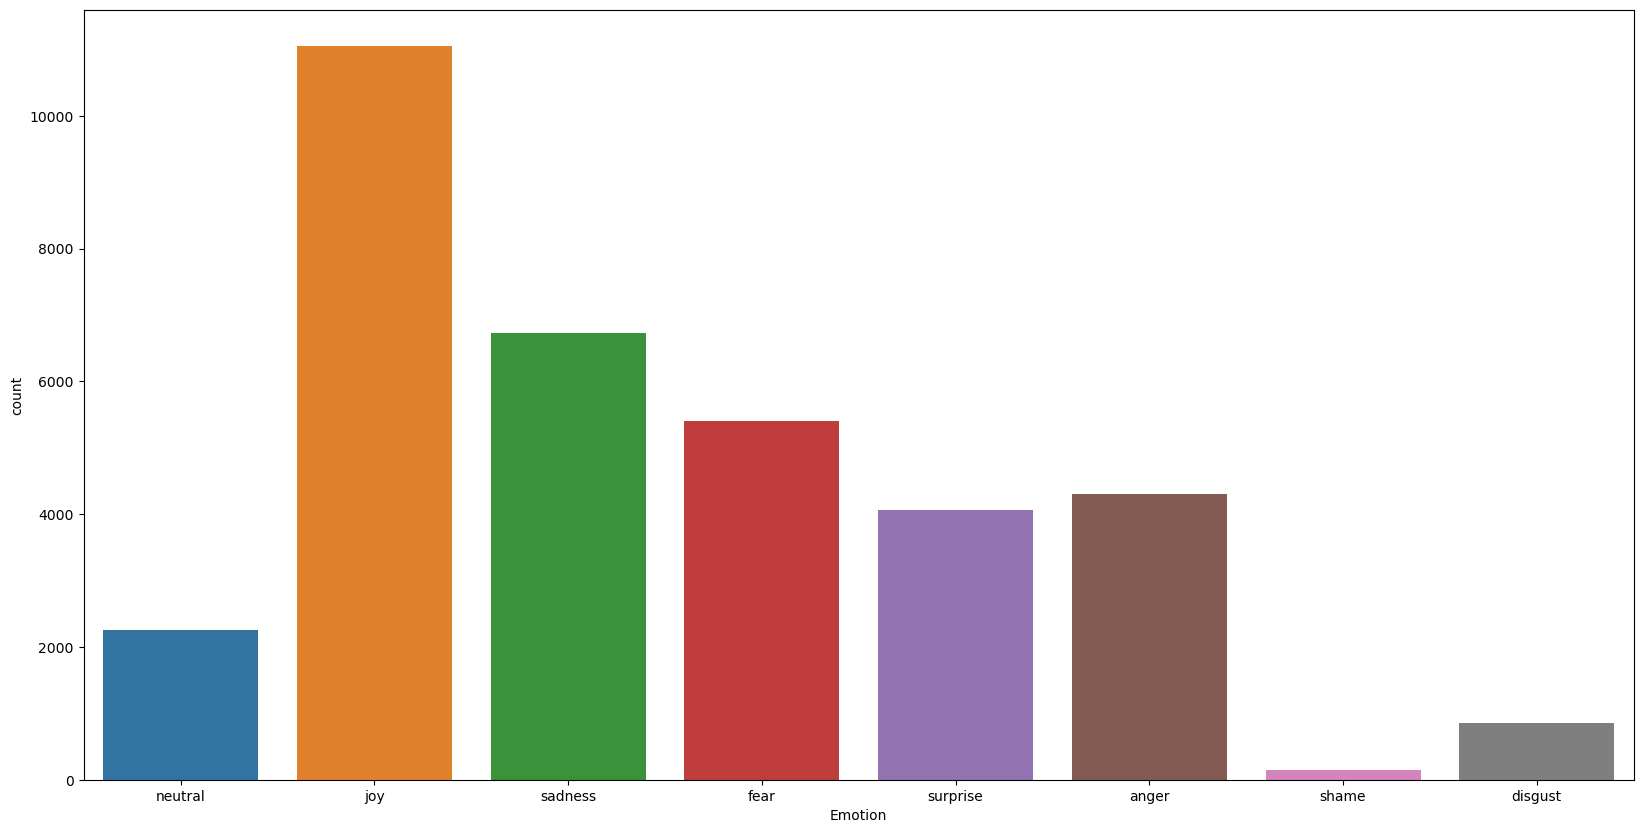

In [25]:
# Step 7: Visualize the distribution of emotions
plt.figure(figsize = (20,10))
sns.countplot(x='Emotion',data=df)
plt.show()

In [26]:
# Step 8: Sentiment Analysis using TextBlob

In [27]:
!pip install TextBlob

In [28]:
#Sentiment Analysis
from textblob import TextBlob

In [29]:
def get_sentiment(text):
    blob= TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        result = "Positive"
    elif sentiment < 0:
        result = "Negative"
    else:
        result="Neutral"
    return result


In [30]:
#TestFxn
get_sentiment("I love coding")

'Positive'

In [31]:
# Step 9: Apply sentiment analysis to the 'Text' column
df['Sentiment'] = df['Text'].apply(get_sentiment)

In [32]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text,Sentiment
0,0,neutral,Why ?,NaN,Neutral
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow,Neutral
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...,Negative
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...,Positive
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...,Neutral


<Axes: xlabel='Emotion,Sentiment'>

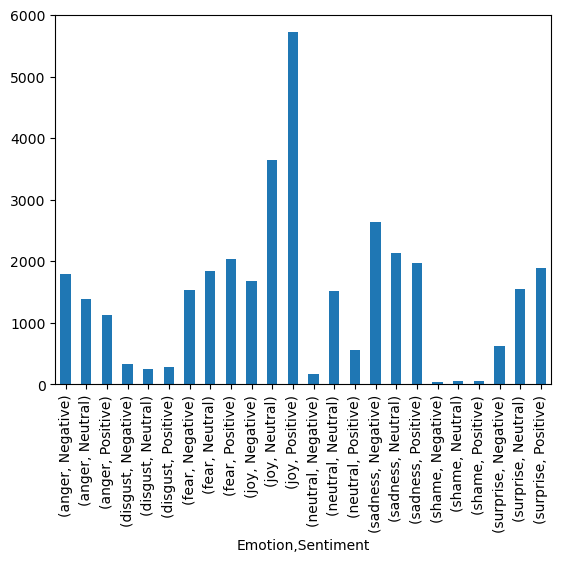

In [33]:
# First method:using matplotlib
# Compare emotion vs sentiment
df.groupby(['Emotion','Sentiment']).size().plot(kind = 'bar')

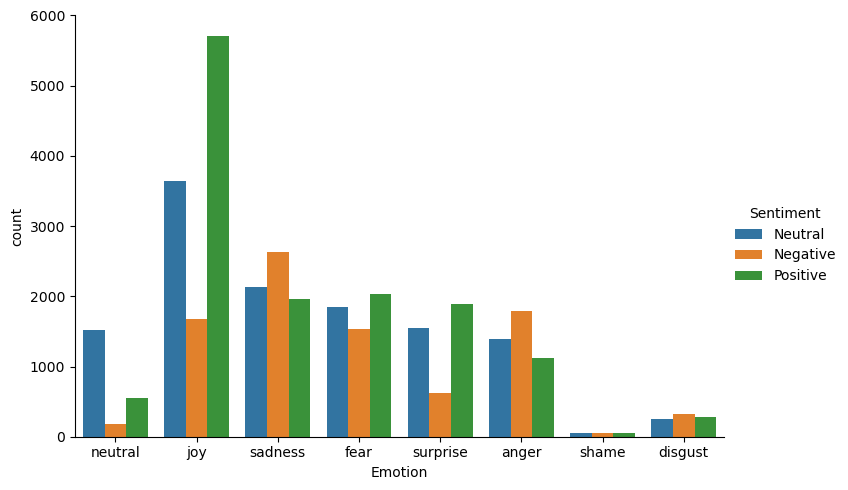

In [34]:
# Step 10: Visualize the relationship between Emotion and Sentiment
#for better view
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x="Emotion", hue='Sentiment', kind='count', data=df, aspect = 1.5)
plt.show()


In [35]:
### Text Cleaning
#Remove noise
#Stop words
#Special characters
#punctuations
#emojis

In [36]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [37]:
# Step 11: Text Cleaning using NeatText

In [38]:
df['Clean_Text']=df['Text'].apply(nfx.remove_stopwords)

In [39]:
df['Clean_Text']=df['Text'].apply(nfx.remove_userhandles)

In [40]:
df['Clean_Text']=df['Text'].apply(nfx.remove_punctuations)

In [41]:
df[['Text','Clean_Text']]

,Text,Clean_Text
0,Why ?,Why
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade on my to do list for tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,ON THE WAY TO MY HOMEGIRL BABY FUNERAL MAN I H...
3,Such an eye ! The true hazel eye-and so brill...,Such an eye The true hazel eyeand so brillia...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,@Iluvmiasantos ugh babe hugggzzz for u babe ...
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,@MichelGW have you gift Hope you like it Its h...
34788,The world didnt give it to me..so the world MO...,The world didnt give it to meso the world MOST...
34789,A man robbed me today .,A man robbed me today
34790,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu call it JEALOUSY I call it of #Losing YOU


In [42]:
#Keyword Extraction
#extract most common words per class of emotion

In [43]:
from collections import Counter

In [44]:
# Step 12: Explore Keywords for each emotion
emotion_list =df['Emotion'].unique().tolist()

In [45]:
emotion_list 

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [46]:
# Step 13: Function to extract keywords
def extract_keywords(text,num=50):
    tokens=[tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [47]:
joy_list = df[df['Emotion'] == 'joy']['Clean_Text'].tolist()

In [48]:
#joy document
joy_docx = ' '.join(joy_list)


In [49]:
joy_docx

'Sage Act upgrade on my to do list for tommorow  Such an eye  The true hazel eyeand so brilliant  Regular features  open countenance  with a complexion  Oh  What a bloom of full health  and such a pretty height and size  such a firm and upright figure  There is health  not merely in her bloom  but in her air  her head  her glance  One hears sometimes of a child being  the picture of health   now  she always gives me the idea of being the complete picture of grownup health  She is loveliness itself   @Iluvmiasantos ugh babe hugggzzz for u   babe naamazed nga ako e babe e despite negas mas pinaramdam at fil ko ang  For once in his life  Leopold must have been truly happy : his hopes and prayers for his beloved son seemed at last to have come to fruition   I have a feeling i will fail french #fuckfrench  GoodLet  s go now   When I fell in love with \\X\\  Overnight I felt confidence selfesteem    responsible and worthwhile One could get terribly ecstatic but that would be a dangerous thin

In [50]:
#extract keywords
keyword_joy = extract_keywords(joy_docx)

In [51]:
keyword_joy

{'the': 5300,
 'to': 4744,
 'I': 4471,
 'a': 3595,
 'and': 3221,
 'of': 2803,
 'my': 2793,
 'in': 2329,
 'for': 1999,
 'is': 1590,
 'with': 1375,
 'you': 1282,
 'that': 1234,
 'was': 1155,
 'me': 1144,
 'at': 1124,
 'on': 1120,
 'it': 1012,
 'have': 962,
 'be': 890,
 'this': 784,
 'day': 729,
 'amp': 678,
 'up': 658,
 'had': 639,
 'all': 636,
 'so': 603,
 'time': 601,
 'Im': 555,
 'when': 544,
 'your': 528,
 'When': 520,
 'The': 516,
 'work': 509,
 'from': 481,
 'not': 480,
 'get': 479,
 'like': 476,
 'an': 473,
 'today': 471,
 'tomorrow': 467,
 'Christmas': 453,
 'out': 453,
 'just': 452,
 'about': 450,
 'now': 442,
 'are': 438,
 'but': 402,
 'love': 393,
 'i': 387}

In [52]:
#plot
def plot_most_common_words(mydict,emotion_name):
    df_01 = pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(20,10))
    plt.title("Plot of {} Most common keywords".format(emotion_name))
    sns.barplot(x='token',y='count',data=df_01)
    plt.xticks(rotation=45)
    plt.show()

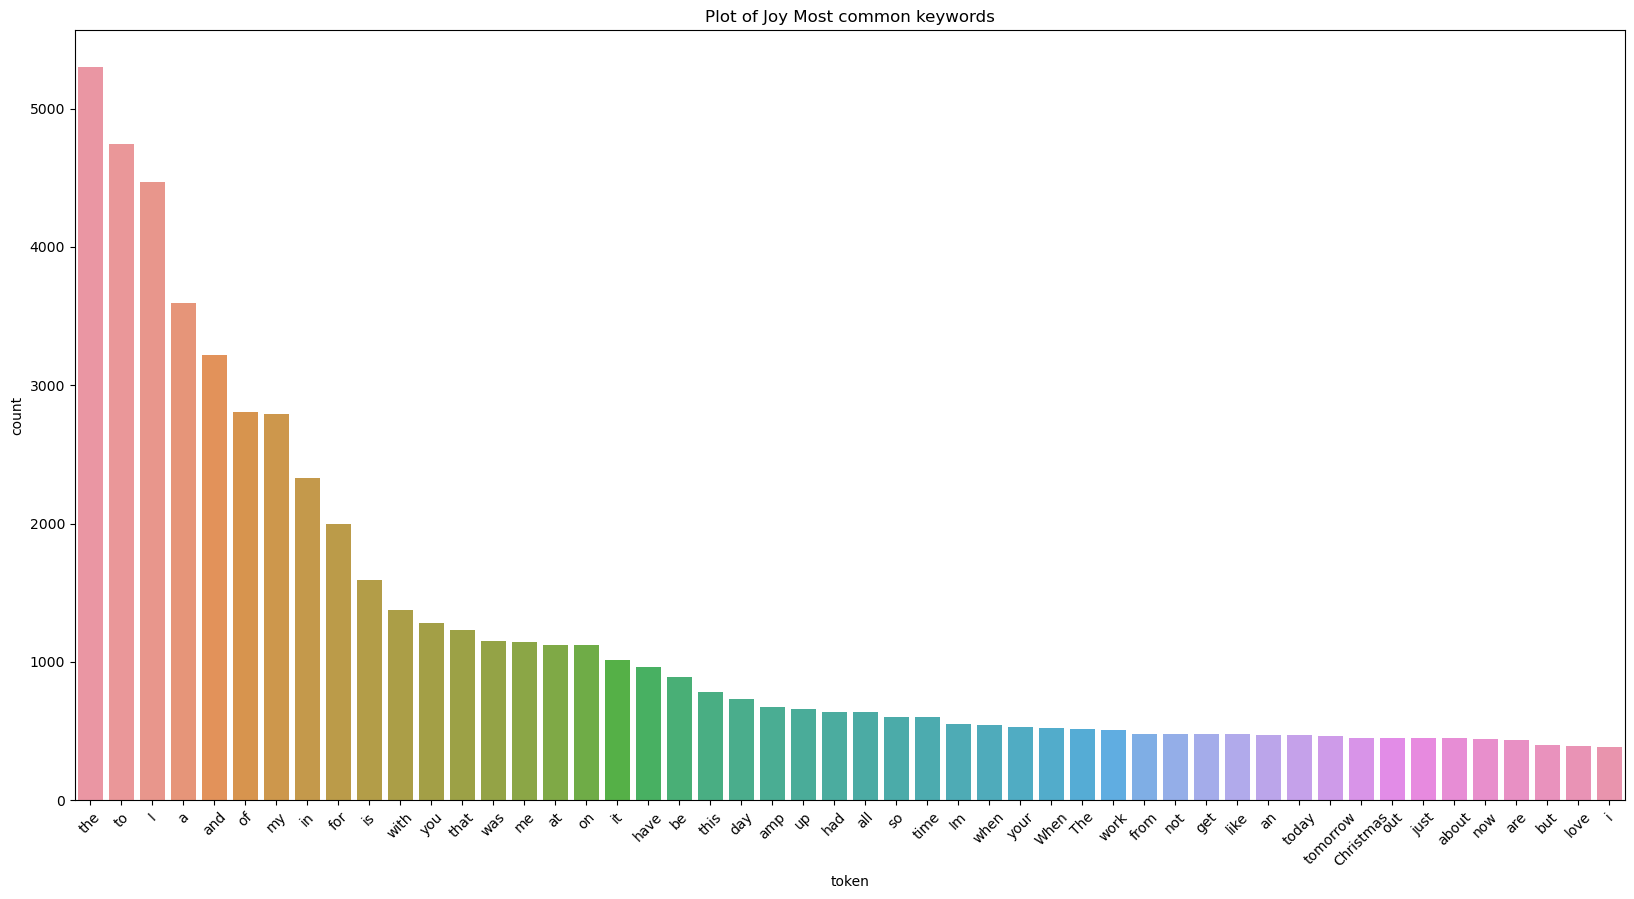

In [53]:
plot_most_common_words(keyword_joy,"Joy")

In [54]:
surprise_list = df[df['Emotion'] == 'surprise']['Clean_Text'].tolist()
#joy document
surprise_docx = ' '.join(surprise_list)
#Extract Keywords
#extract keywords
keyword_surprise = extract_keywords(surprise_docx)


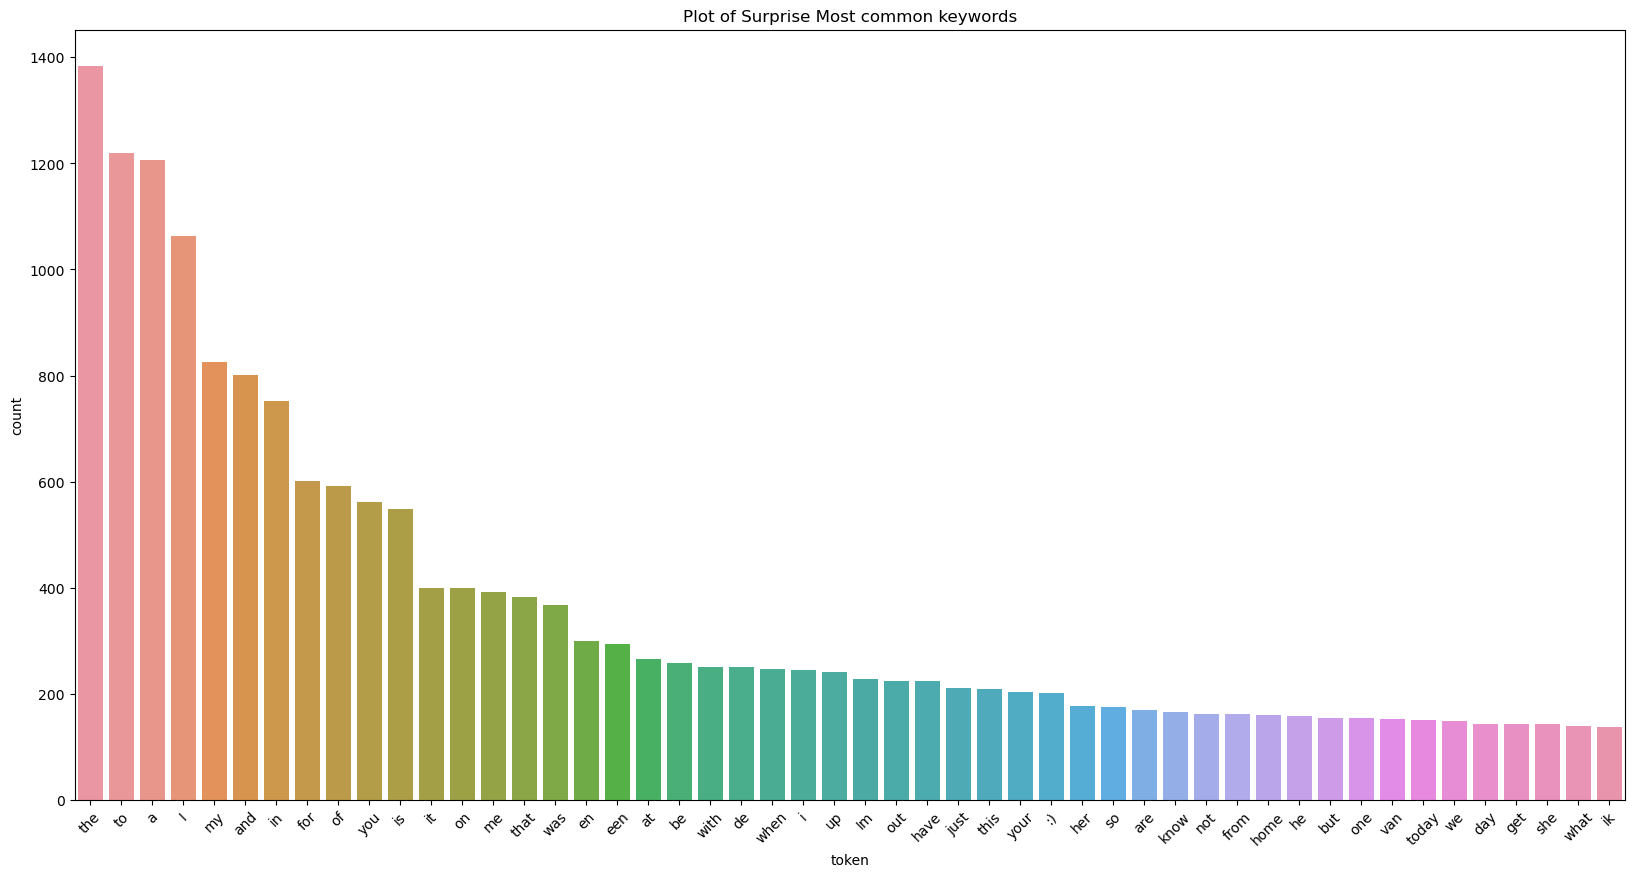

In [55]:
plot_most_common_words(keyword_surprise,"Surprise")

In [56]:
emotion_list 

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [57]:
neutral_list = df[df['Emotion'] == 'neutral']['Clean_Text'].tolist()
#joy document
neutral_docx = ' '.join(neutral_list)
#Extract Keywords
#extract keywords
keyword_neutral = extract_keywords(neutral_docx)


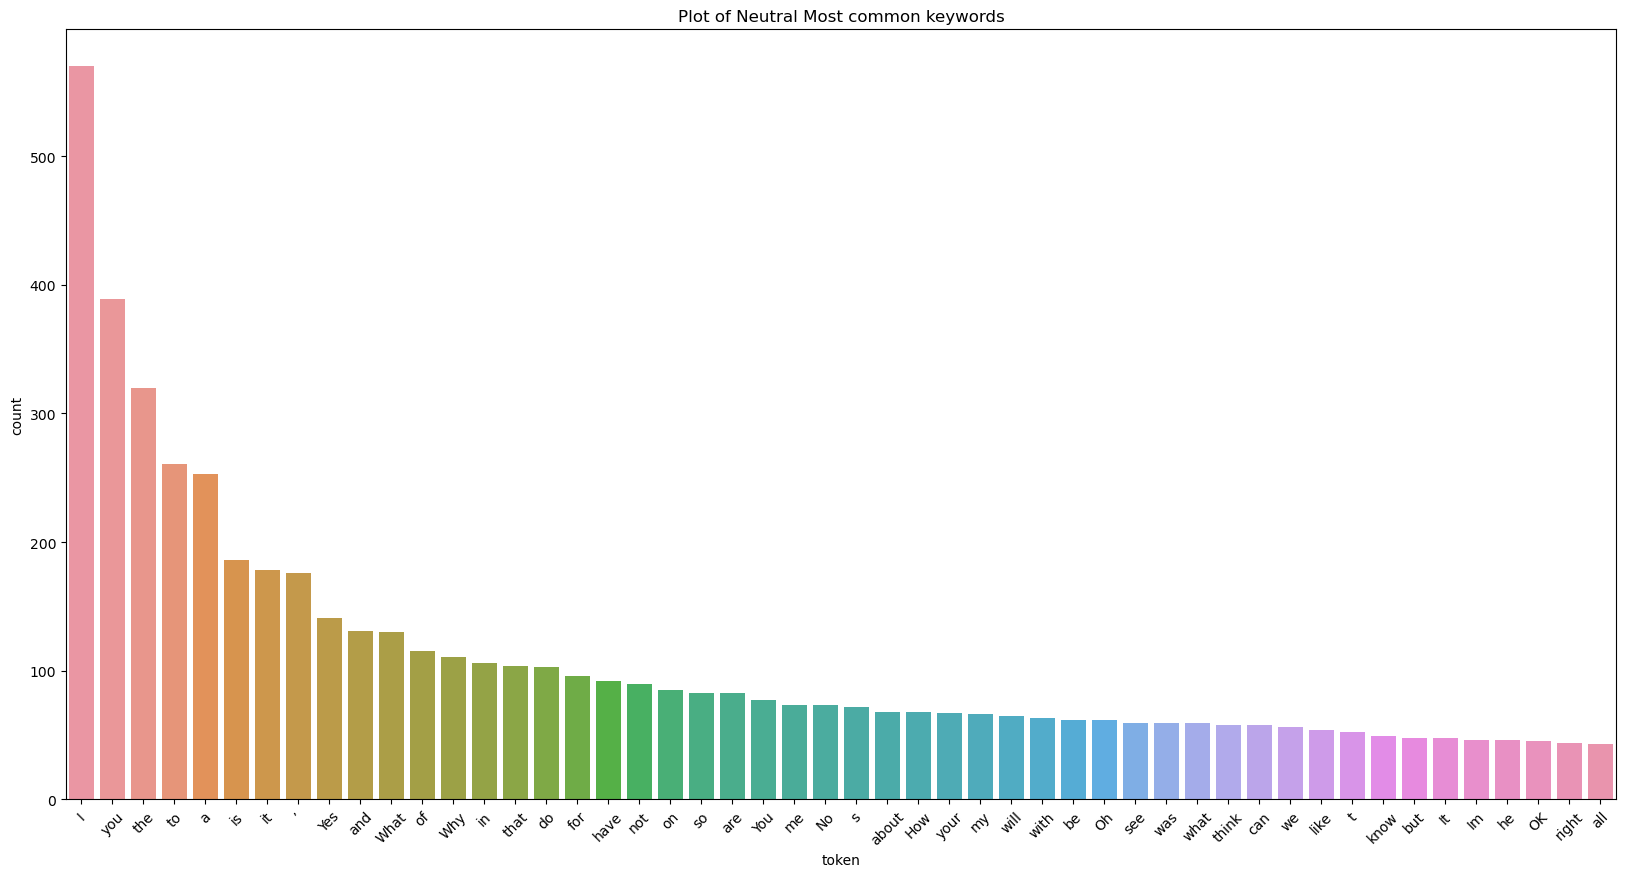

In [58]:
plot_most_common_words(keyword_neutral,"Neutral")

In [59]:
# Step 14: Loop through emotions and create keyword plots

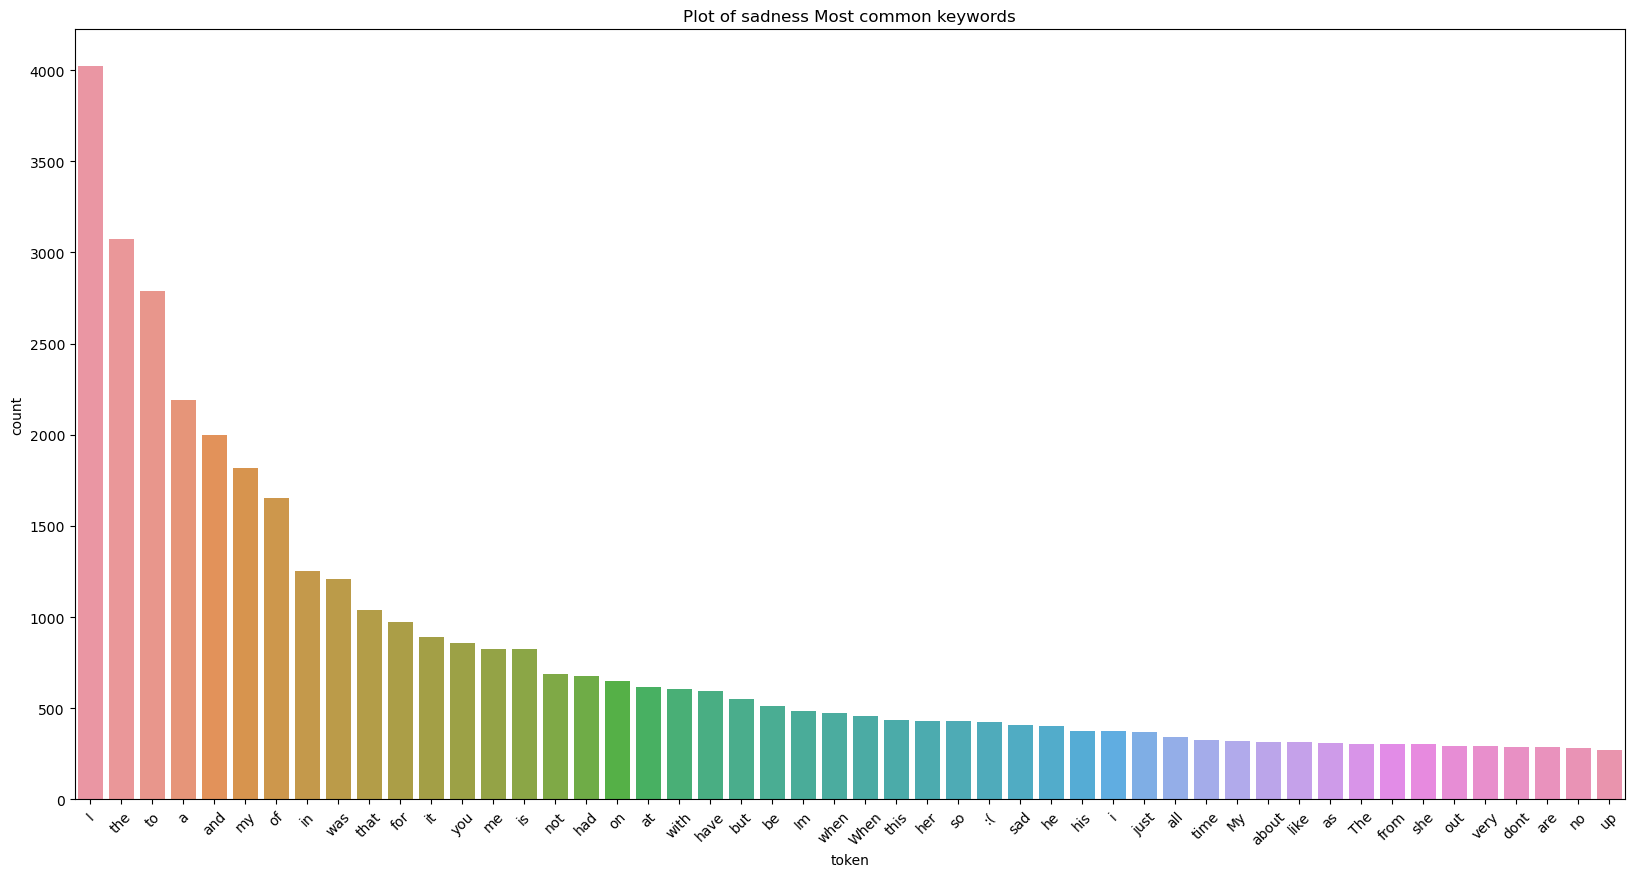

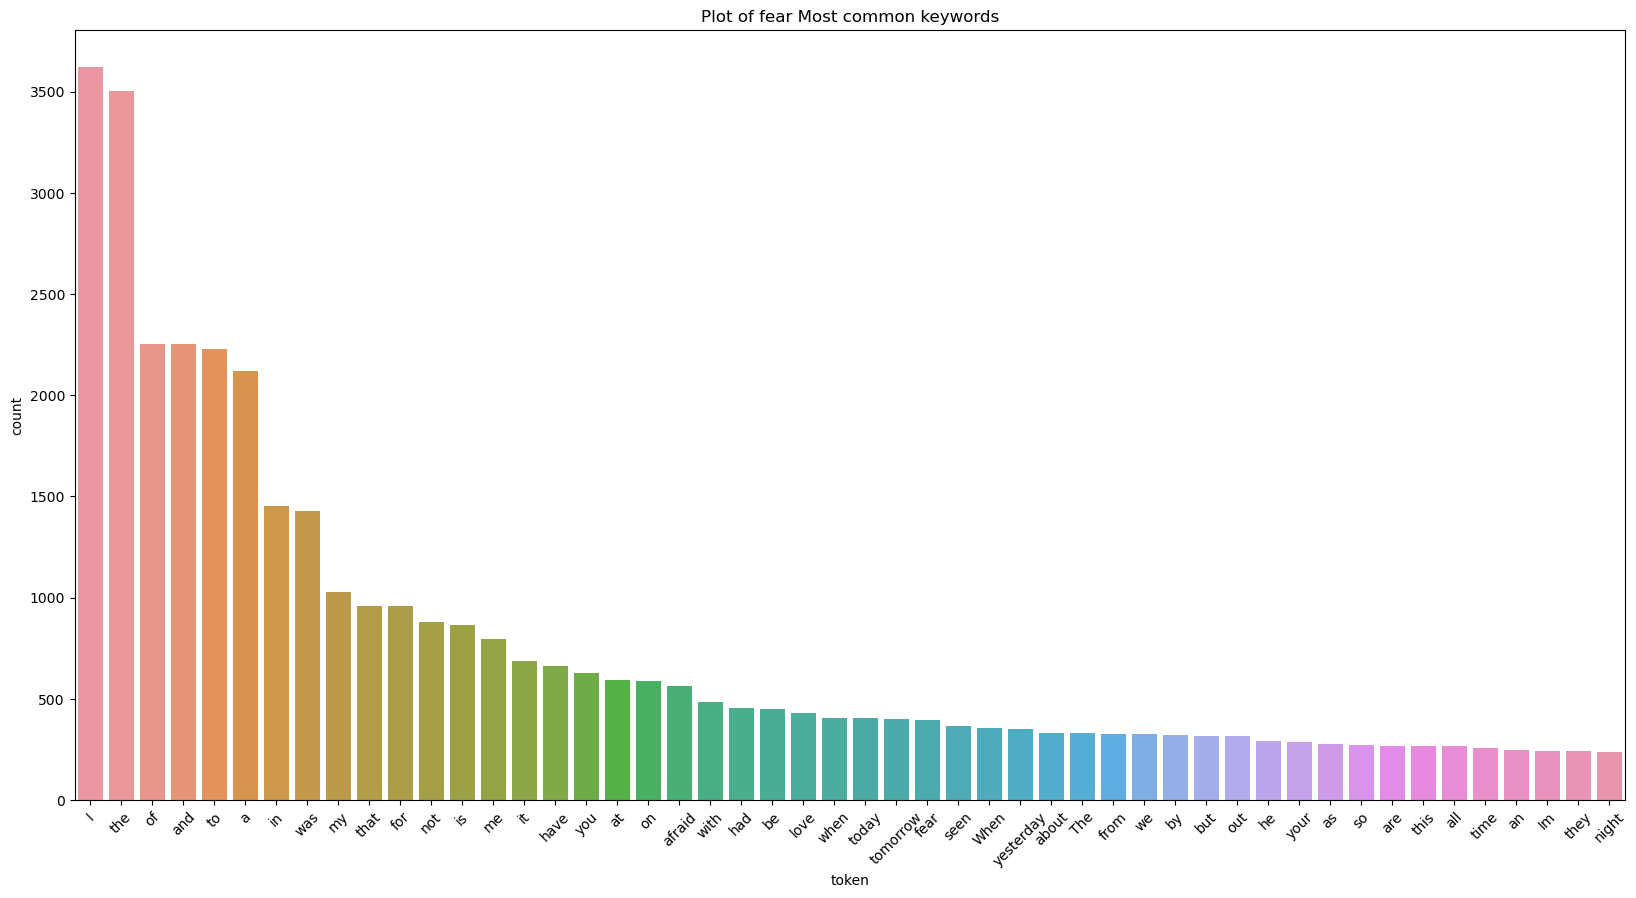

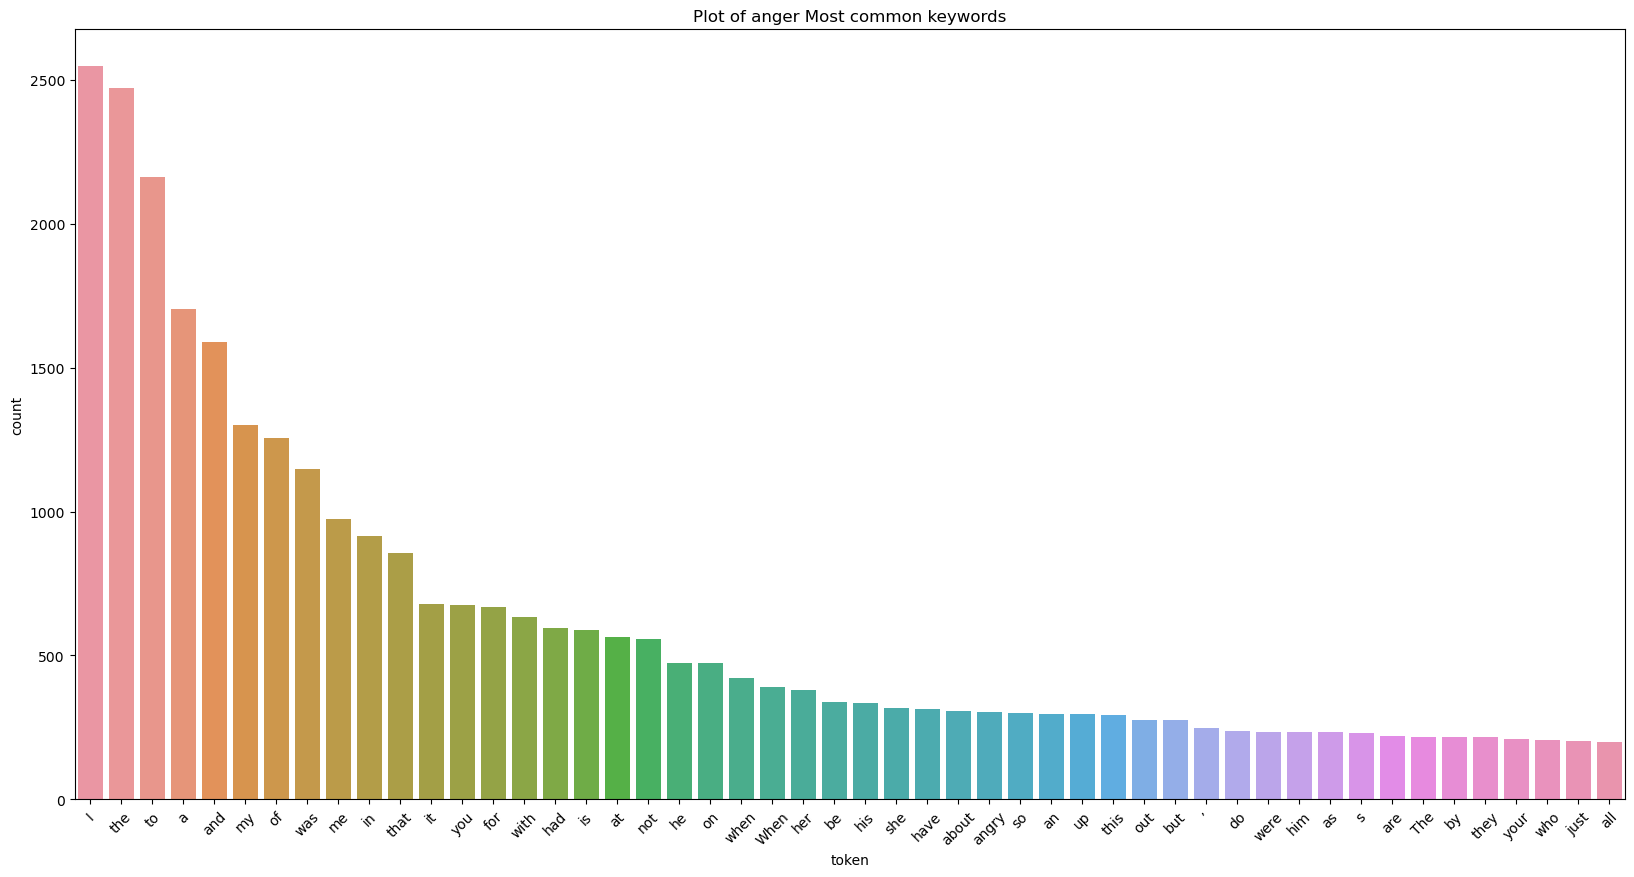

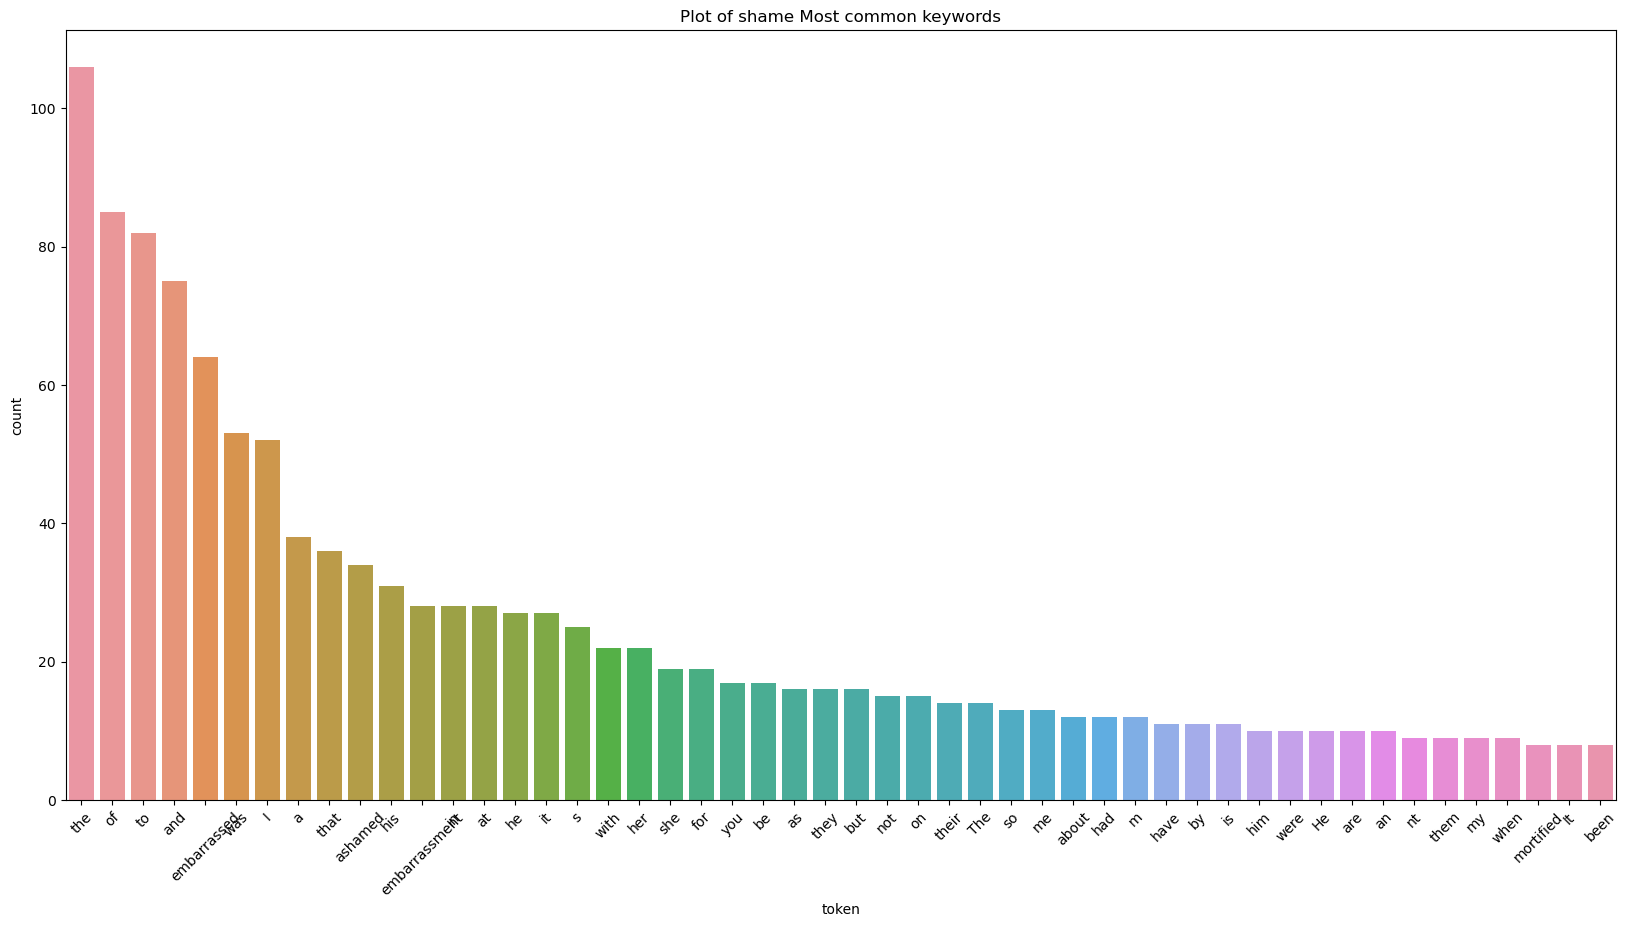

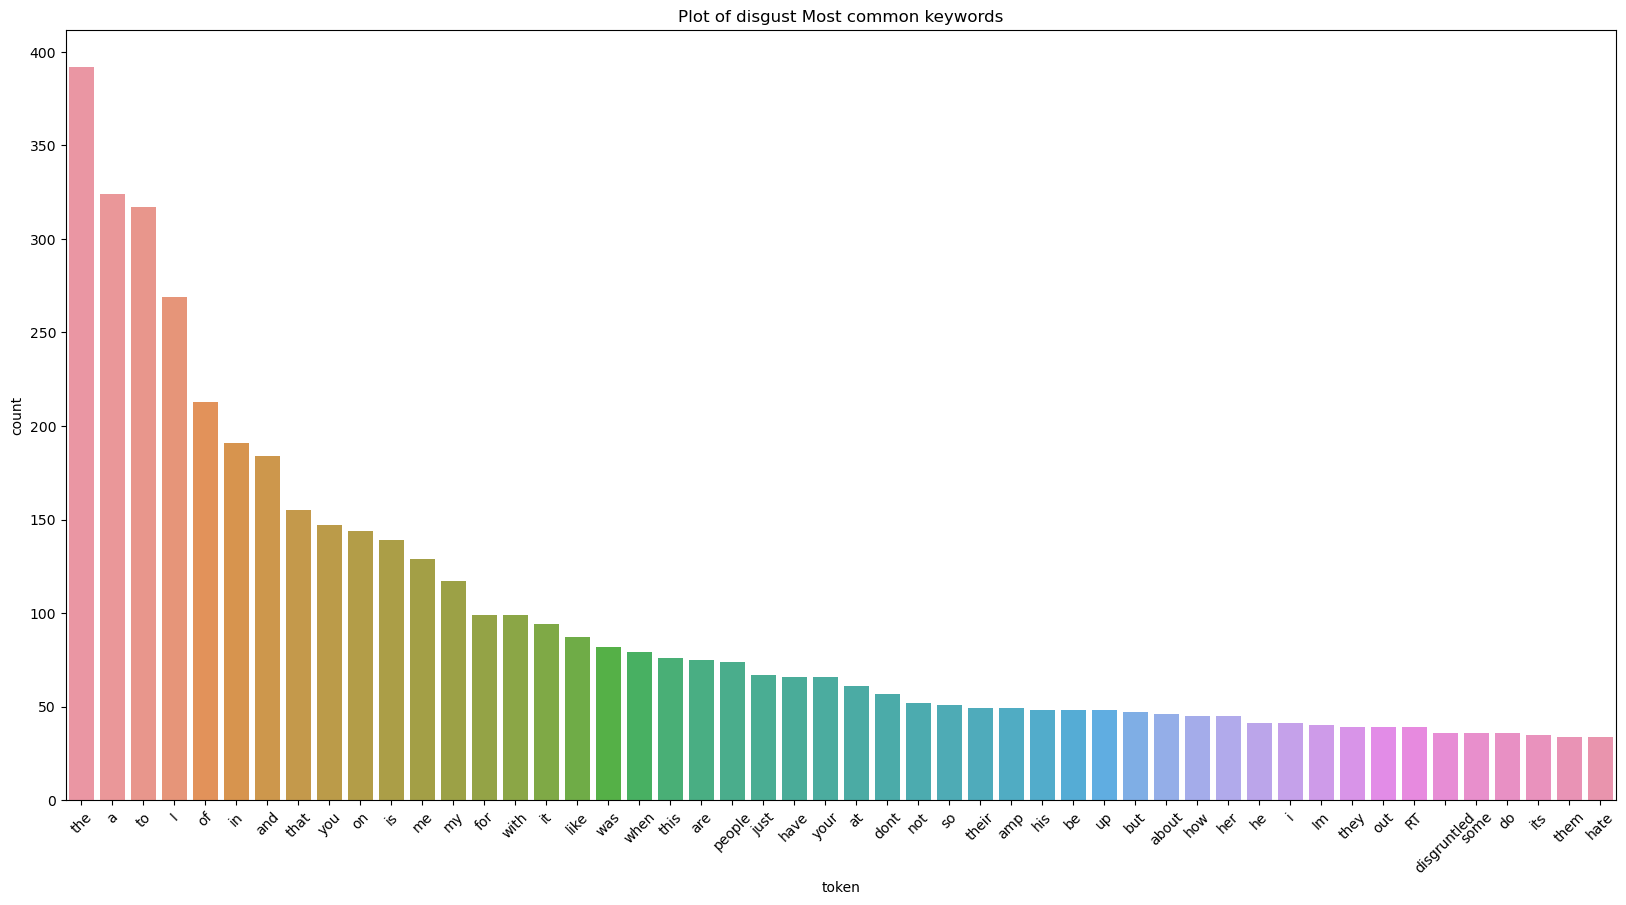

In [60]:
sadness_list = df[df['Emotion'] == 'sadness']['Clean_Text'].tolist()
#joy document
sadness_docx = ' '.join(sadness_list)
#Extract Keywords
keyword_sadness = extract_keywords(sadness_docx)
plot_most_common_words(keyword_sadness,"sadness")

fear_list = df[df['Emotion'] == 'fear']['Clean_Text'].tolist()
#joy document
fear_docx = ' '.join(fear_list)
#Extract Keywords
keyword_fear = extract_keywords(fear_docx)
plot_most_common_words(keyword_fear,"fear")

anger_list = df[df['Emotion'] == 'anger']['Clean_Text'].tolist()
#joy document
anger_docx = ' '.join(anger_list)
#Extract Keywords
keyword_anger = extract_keywords(anger_docx)
plot_most_common_words(keyword_anger,"anger")

shame_list = df[df['Emotion'] == 'shame']['Clean_Text'].tolist()
#joy document
shame_docx = ' '.join(shame_list)
#Extract Keywords
keyword_shame = extract_keywords(shame_docx)
plot_most_common_words(keyword_shame,"shame")

disgust_list = df[df['Emotion'] == 'disgust']['Clean_Text'].tolist()
#joy document
disgust_docx = ' '.join(disgust_list)
#Extract Keywords
keyword_disgust= extract_keywords(disgust_docx)
plot_most_common_words(keyword_disgust,"disgust")

In [61]:
!pip install wordcloud

In [62]:
# Step 15: Generate Word Clouds
from wordcloud import WordCloud

In [63]:
def plot_wordcloud(docx):
    mywordcloud = WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(mywordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

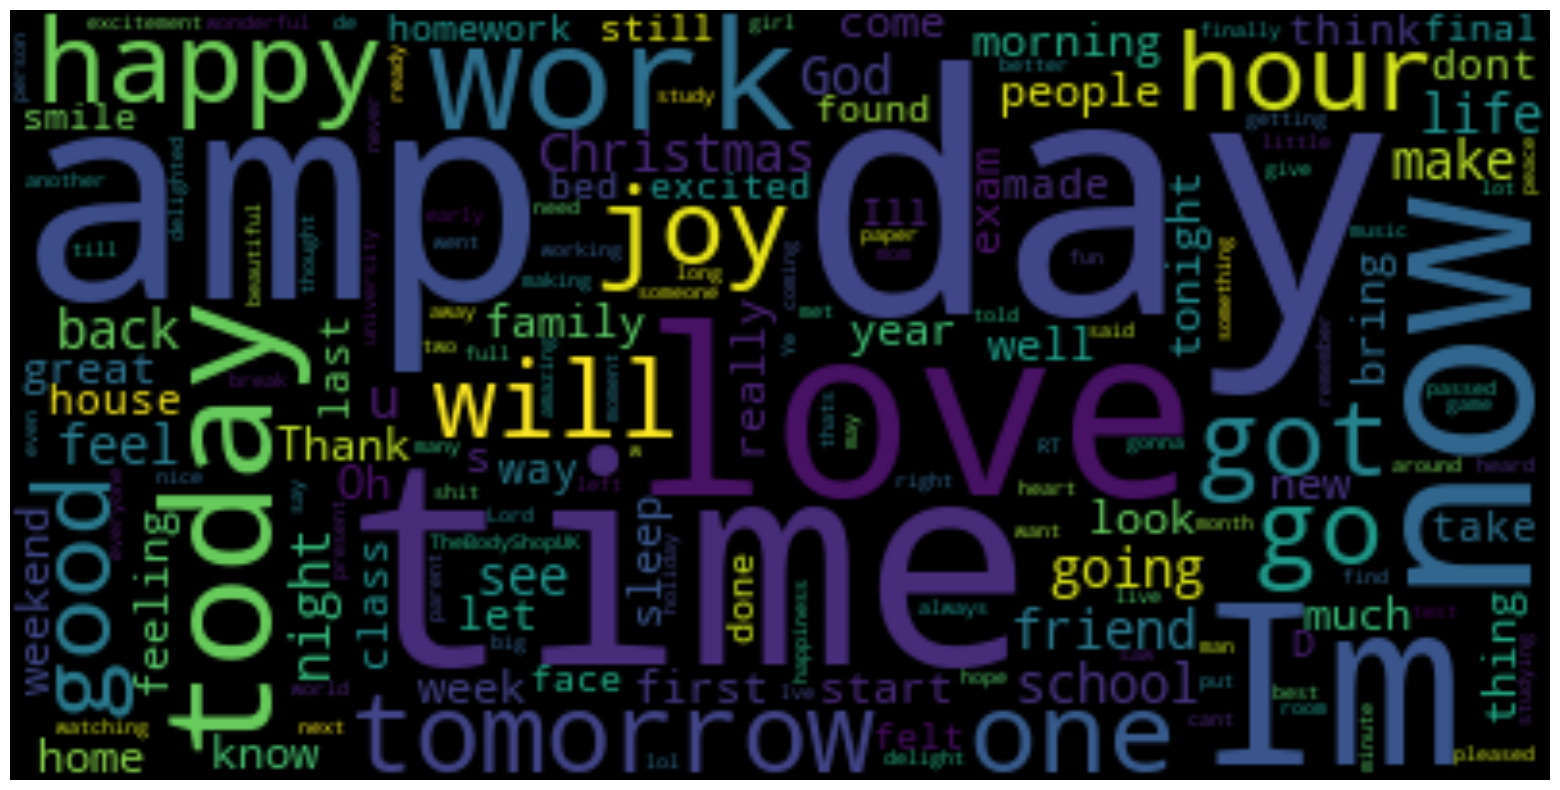

In [64]:
plot_wordcloud(joy_docx)

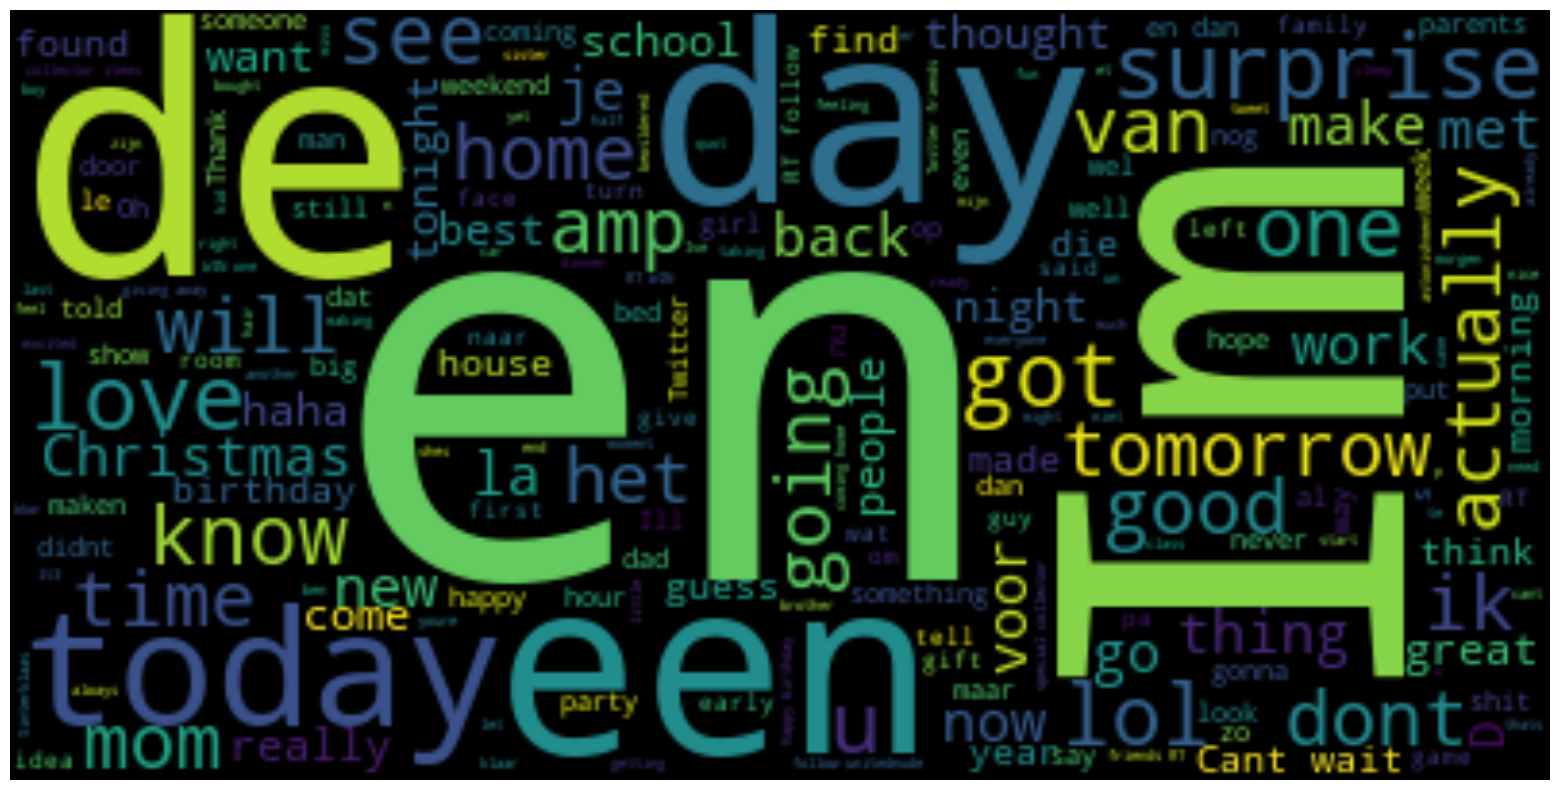

In [65]:
plot_wordcloud(surprise_docx)

In [66]:
# Step 16: Machine Learning - Naive Bayes Classifier

In [67]:
pip install --upgrade scikit-learn


In [68]:
!pip install --upgrade scikit-learn


In [69]:
import sklearn
print(sklearn.__version__)


1.3.2


In [70]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [72]:
#Split Dataset
from sklearn.model_selection import train_test_split

In [73]:
#Build Features from our text
Xfeatures =df['Clean_Text']
ylabels = df['Emotion']

In [74]:
Xfeatures

0                                                    Why  
1           Sage Act upgrade on my to do list for tommorow
2        ON THE WAY TO MY HOMEGIRL BABY FUNERAL MAN I H...
3         Such an eye  The true hazel eyeand so brillia...
4        @Iluvmiasantos ugh babe hugggzzz for u   babe ...
                               ...                        
34787    @MichelGW have you gift Hope you like it Its h...
34788    The world didnt give it to meso the world MOST...
34789                              A man robbed me today  
34790       Youu call it JEALOUSY I call it of #Losing YOU
34791    I think about you baby and I dream about you a...
Name: Clean_Text, Length: 34792, dtype: object

In [75]:
# Step 17: Vectorize the text data
cv = CountVectorizer()
cv.fit_transform(Xfeatures)
X = cv.fit_transform(Xfeatures)

In [76]:
list(cv.get_feature_names_out())


['00',
 '000',
 '000ème',
 '0021',
 '00am',
 '00pm',
 '01',
 '0235299130',
 '0330',
 '0400',
 '045',
 '05',
 '0512',
 '05thuglife',
 '06',
 '073',
 '0798765',
 '08',
 '0800',
 '09',
 '099b8',
 '0l',
 '0ntworpen',
 '0o',
 '0oquot',
 '0w',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '100000yr',
 '10000th',
 '1000gifts',
 '1000s',
 '1000shs',
 '1000th',
 '100prayingwomen',
 '100s',
 '100th',
 '101',
 '1010',
 '1015',
 '101quot',
 '102',
 '1021',
 '1022',
 '103',
 '1030',
 '1030am',
 '1030pm',
 '10373629',
 '104',
 '1040',
 '105',
 '106',
 '1080',
 '10am',
 '10ans',
 '10h',
 '10hrs',
 '10k',
 '10mins',
 '10pm',
 '10puntos',
 '10ritengono',
 '10th',
 '10x',
 '10year',
 '10years',
 '10yrolds',
 '11',
 '110',
 '1100pm',
 '1104',
 '110km',
 '111',
 '1111ème',
 '1116am',
 '112',
 '112mark',
 '1130',
 '115',
 '1162',
 '118',
 '11am',
 '11hour',
 '11months',
 '11pm',
 '11yr',
 '12',
 '120',
 '1200',
 '121',
 '12181',
 '122',
 '122511',
 '123',
 '1230',
 '125',
 '1250',
 '12521260',
 '128',
 '12

In [77]:
# Step 18: Split the dataset
X_train, X_test, y_train,y_test = train_test_split(X,ylabels,test_size=0.3,random_state = 42)

In [78]:
# Step 19: Build Naive Bayes Model
nv_model = MultinomialNB()
nv_model.fit(X_train,y_train)


MultinomialNB()

In [79]:
# Step 20: Evaluate the Naive Bayes model
#Accuracy
nv_model.score(X_test, y_test)

0.5637095228971067

In [80]:
#Predictions
y_pred_for_nv = nv_model.predict(X_test)


In [81]:
y_pred_for_nv

array(['fear', 'sadness', 'sadness', ..., 'sadness', 'joy', 'sadness'],
      dtype='<U8')

In [82]:
#Make a single prediction
#Vectorized out text
#applied our model

In [83]:
sample_text = ['I love this so much']

In [84]:
vect = cv.transform(sample_text).toarray()

In [85]:
#Make prediction
nv_model.predict(vect)

array(['joy'], dtype='<U8')

In [86]:
# Check for the prediction probablity(Percentage)/cofidence score
nv_model.predict_proba(vect)


array([[1.13782163e-02, 5.89456452e-05, 7.41260994e-02, 7.85867349e-01,
        4.26088473e-04, 1.16128574e-01, 8.68526771e-09, 1.20147182e-02]])

In [87]:
#Get all class for our model
nv_model.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype='<U8')

In [88]:
np.max(nv_model.predict_proba(vect))

0.7858673489059358

In [89]:
def predict_emotion(sample_text,model):
    myvect =  cv.transform(sample_text).toarray()
    prediction = model.predict(myvect)
    pred_proba = model.predict_proba(myvect)
    pred_percentage_for_all = dict(zip(model.classes_,pred_proba[0]))
    print("Prediction:{},Prediction Score:{}".format(prediction[0],np.max(pred_proba)))
    return pred_percentage_for_all   

In [90]:
predict_emotion(sample_text,nv_model)

Prediction:joy,Prediction Score:0.7858673489059358


{'anger': 0.011378216309049257,
 'disgust': 5.8945645236109936e-05,
 'fear': 0.07412609937269381,
 'joy': 0.7858673489059358,
 'neutral': 0.00042608847280058864,
 'sadness': 0.116128574372393,
 'shame': 8.685267707248765e-09,
 'surprise': 0.012014718236623343}

In [91]:
predict_emotion(["He hates running"], nv_model)

Prediction:joy,Prediction Score:0.4799244366844958


{'anger': 0.0701774733257746,
 'disgust': 0.0026624253729051438,
 'fear': 0.08311991542349229,
 'joy': 0.4799244366844958,
 'neutral': 0.008178533718732419,
 'sadness': 0.30408847468795785,
 'shame': 0.00019538860317418693,
 'surprise': 0.05165335218346886}

In [92]:
#model evaluation
#classification
print(classification_report(y_test,y_pred_for_nv))

              precision    recall  f1-score   support

       anger       0.65      0.48      0.55      1283
     disgust       0.43      0.02      0.04       292
        fear       0.74      0.57      0.65      1645
         joy       0.51      0.88      0.65      3311
     neutral       0.75      0.10      0.17       675
     sadness       0.54      0.53      0.54      2015
       shame       0.00      0.00      0.00        36
    surprise       0.59      0.24      0.34      1181

    accuracy                           0.56     10438
   macro avg       0.53      0.35      0.37     10438
weighted avg       0.59      0.56      0.53     10438



C:\Users\Dharmagna Vyas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dharmagna Vyas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dharmagna Vyas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [93]:
#confusioin matrix
confusion_matrix(y_test, y_pred_for_nv)

array([[ 612,    0,   61,  396,    1,  203,    0,   10],
       [  32,    6,   27,  152,    0,   69,    0,    6],
       [  73,    2,  938,  380,    5,  172,    0,   75],
       [  56,    2,   99, 2903,    6,  178,    0,   67],
       [  27,    0,   17,  437,   65,  123,    0,    6],
       [  85,    0,   61,  752,    6, 1077,    0,   34],
       [   9,    0,    7,   12,    0,    8,    0,    0],
       [  52,    4,   52,  638,    4,  148,    0,  283]], dtype=int64)

C:\Users\Dharmagna Vyas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dharmagna Vyas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dharmagna Vyas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       anger       0.65      0.48      0.55      1283
     disgust       0.43      0.02      0.04       292
        fear       0.74      0.57      0.65      1645
         joy       0.51      0.88      0.65      3311
     neutral       0.75      0.10      0.17       675
     sadness       0.54      0.53      0.54      2015
       shame       0.00      0.00      0.00        36
    surprise       0.59      0.24      0.34      1181

    accuracy                           0.56     10438
   macro avg       0.53      0.35      0.37     10438
weighted avg       0.59      0.56      0.53     10438



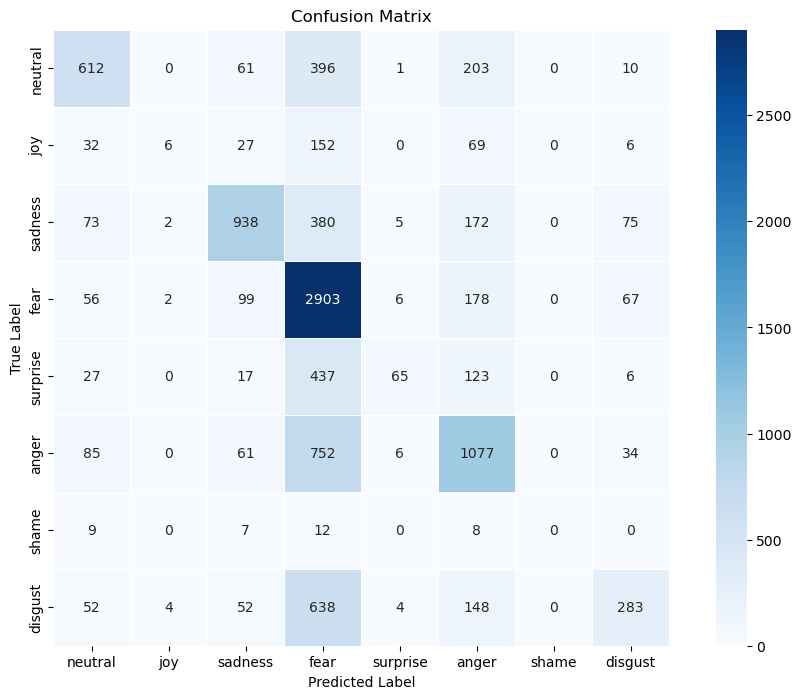

In [94]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# model evaluation
print(classification_report(y_test, y_pred_for_nv))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_for_nv)

# custom confusion matrix plot
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, linewidths=.5, square=True,
                xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# get unique class labels
classes = df['Emotion'].unique()

# plot confusion matrix
plot_confusion_matrix(cm, classes, title='Confusion Matrix')


In [95]:
# Step 21: Save Naive Bayes model
import joblib

In [96]:
model_file = open("emotion_classifier_nv_model_25.pkl","wb")
joblib.dump(nv_model , model_file)
model_file.close()

In [97]:
# Step 22: Machine Learning - Logistic Regression

In [98]:
#Logistic Regrssion model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

C:\Users\Dharmagna Vyas\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [99]:
# Step 23: Evaluate Logistic Regression model
#Accuracy
lr_model.score(X_test,y_test)

0.635753975857444

In [100]:
# Step 24: Save Logistic Regression model
model_file_lr = open("emotion_classifier_lr_model.pkl", "wb")
joblib.dump(lr_model, model_file_lr)
model_file_lr.close()

In [105]:
#Simple prediction
predict_emotion(sample_text,lr_model)

Prediction:joy,Prediction Score:0.5452592072241792


{'anger': 0.026122249836417876,
 'disgust': 0.013307767951062302,
 'fear': 0.04702584598951209,
 'joy': 0.5452592072241792,
 'neutral': 0.12539013088613776,
 'sadness': 0.15374136902650926,
 'shame': 0.0004301677435607406,
 'surprise': 0.08872326134262079}

In [123]:
# Step 25: Cross-validated Accuracy
from sklearn.model_selection import cross_val_score
# Assuming your model is named 'lr_model' and X, y are your feature matrix and target variable
scores = cross_val_score(lr_model, X_test, y_test, cv=5)  # 5-fold cross-validation
print("Cross-validated Accuracy:", scores.mean())


C:\Users\Dharmagna Vyas\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dharmagna Vyas\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Cross-validated Accuracy: 0.5856474673540086


C:\Users\Dharmagna Vyas\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [124]:
# Step 26: Model Evaluation Metrics

from sklearn.metrics import confusion_matrix, classification_report
# Assuming 'lr_model' is your Logistic Regression model
y_pred = lr_model.predict(X_test)

# Step 27: Confusion Matrix for Logistic Regression

cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", report)


Confusion Matrix:
 [[ 745   10   70  181   68  163    1   45]
 [  37   59   28   81    6   53    1   27]
 [  92    2 1099  208   39  136    0   69]
 [ 118    9  144 2497  129  242    0  172]
 [  15    0   11   72  521   47    0    9]
 [ 137   10   97  453   60 1166    1   91]
 [   1    0    0    4    0    3   27    1]
 [  55    5   60  369   32  137    1  522]]

Classification Report:
               precision    recall  f1-score   support

       anger       0.62      0.58      0.60      1283
     disgust       0.62      0.20      0.30       292
        fear       0.73      0.67      0.70      1645
         joy       0.65      0.75      0.70      3311
     neutral       0.61      0.77      0.68       675
     sadness       0.60      0.58      0.59      2015
       shame       0.87      0.75      0.81        36
    surprise       0.56      0.44      0.49      1181

    accuracy                           0.64     10438
   macro avg       0.66      0.59      0.61     10438
weighted avg   

In [126]:
# Step 28: Additional Model Evaluation Metrics for Logistic Regression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'lr_model' is your Logistic Regression model
y_pred = lr_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Accuracy: 0.635753975857444
Precision: 0.6345122837708524
Recall: 0.635753975857444
F1-Score: 0.6291144543948544


In [102]:
"""
What I Learned:
Through this project, I learned how to make computers understand emotions in text. I learned to clean up messy text data, analyze sentiments, and use machine learning to predict emotions. I also learned how to evaluate how well the computer is doing and save my work for future use. It's like teaching a computer to read and understand feelings in written words!
"""

"\nWhat I Learned:\nThrough this project, I learned how to make computers understand emotions in text. I learned to clean up messy text data, analyze sentiments, and use machine learning to predict emotions. I also learned how to evaluate how well the computer is doing and save my work for future use. It's like teaching a computer to read and understand feelings in written words!\n"